In [711]:
import numpy as np
import urllib
import scipy.optimize
import random
from sklearn import linear_model
import gzip
from collections import defaultdict

In [712]:
import warnings
warnings.filterwarnings("ignore")

In [713]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(books, N):
    assert len(books) == N
    assert [type(float(x)) for x in books] == [float]*N

In [714]:
f = open("5year.arff", 'r')

In [715]:
# Read and parse the data
while not '@data' in f.readline():
    pass

dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)

In [716]:
X = [d[:-1] for d in dataset]
y = [d[-1] for d in dataset]

In [717]:
answers = {} # Your answers

In [718]:
def accuracy(predictions, y):
    return sum([0 if predictions != y else 1 for predictions, y in zip(predictions, y)]) / len(y)

In [719]:
from sklearn.metrics import balanced_accuracy_score
def BER(predictions, y):
    return 1 - balanced_accuracy_score(y, predictions).item()

In [720]:
### Question 1

0.9660178159023425 0.47651443643350133


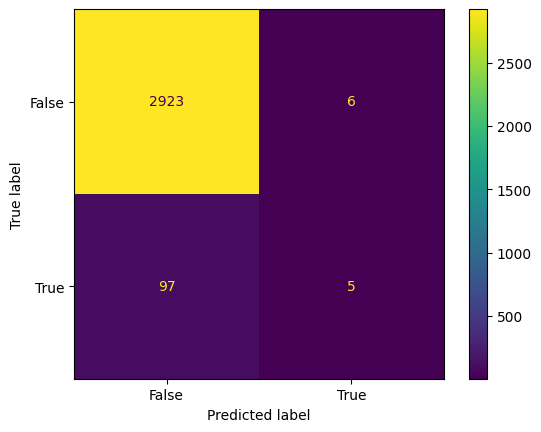

In [721]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mod = linear_model.LogisticRegression(C=1)
mod.fit(X,y)
matrix = confusion_matrix(y, mod.predict(X))
_ = ConfusionMatrixDisplay.from_estimator(mod , X, y)

pred = mod.predict(X)
acc1 = accuracy(pred, y)
ber1 = BER(pred, y)
print(acc1, ber1)

In [722]:
answers['Q1'] = [acc1, ber1] # Accuracy and balanced error rate

In [723]:
assertFloatList(answers['Q1'], 2)

In [724]:
### Question 2

0.6961398878258 0.3038897703157739


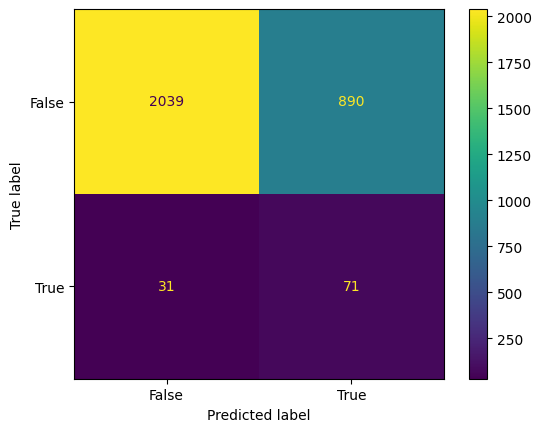

In [725]:
mod = linear_model.LogisticRegression(C=1, class_weight='balanced')
mod.fit(X,y)

matrix = confusion_matrix(y, mod.predict(X))
_ = ConfusionMatrixDisplay.from_estimator(mod , X, y)

pred = mod.predict(X)
acc2 = accuracy(pred, y)
ber2 = BER(pred, y)
print(acc2, ber2)

In [726]:
answers['Q2'] = [acc2, ber2]

In [727]:
assertFloatList(answers['Q2'], 2)

In [728]:
### Question 3

In [729]:
random.seed(3)
random.shuffle(dataset)

In [730]:
X = [d[:-1] for d in dataset]
y = [d[-1] for d in dataset]

In [731]:
Xtrain, Xvalid, Xtest = X[:len(X)//2], X[len(X)//2:(3*len(X))//4], X[(3*len(X))//4:]
ytrain, yvalid, ytest = y[:len(X)//2], y[len(X)//2:(3*len(X))//4], y[(3*len(X))//4:]

In [732]:
len(Xtrain), len(Xvalid), len(Xtest)

(1515, 758, 758)

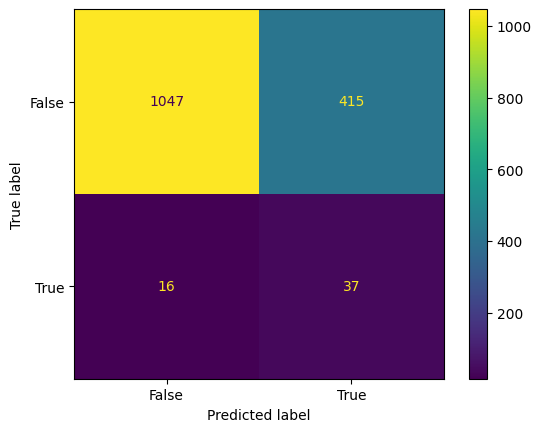

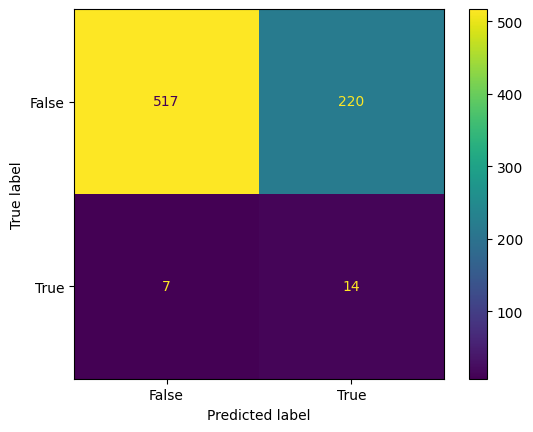

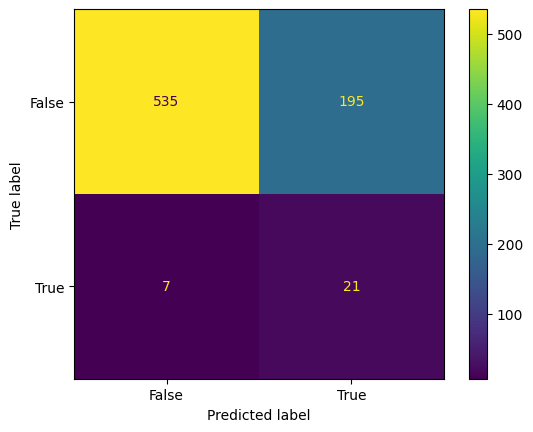

In [733]:
model = linear_model.LogisticRegression(C=1, class_weight='balanced')
model.fit(Xtrain, ytrain)
matrix = confusion_matrix(ytrain, model.predict(Xtrain))
_ = ConfusionMatrixDisplay.from_estimator(model , Xtrain, ytrain)

matrix_valid = confusion_matrix(yvalid, model.predict(Xvalid))
_ = ConfusionMatrixDisplay.from_estimator(model , Xvalid, yvalid)

matrix_test = confusion_matrix(ytest, model.predict(Xtest))
_ = ConfusionMatrixDisplay.from_estimator(model , Xtest, ytest)



In [734]:
berTrain = BER(model.predict(Xtrain), ytrain)
berValid = BER(model.predict(Xvalid), yvalid)
berTest = BER(model.predict(Xtest), ytest)

In [735]:
answers['Q3'] = [berTrain, berValid, berTest]

In [736]:
assertFloatList(answers['Q3'], 3)

In [737]:
### Question 4

In [738]:
models = []
for CC in [10**k for k in range(-4, 5)]:
    model = linear_model.LogisticRegression(C=CC, class_weight='balanced')
    model.fit(Xtrain, ytrain)
    models.append(model)
berList = [BER(model.predict(Xvalid), yvalid) for model in models]

In [739]:
answers['Q4'] = berList
print(answers['Q4'])

[0.3022872649738322, 0.31931252826775225, 0.33220262324739935, 0.3179556761646314, 0.3159203980099503, 0.3111714156490276, 0.2955030044582283, 0.29618143050978873, 0.29618143050978873]


In [740]:
assertFloatList(answers['Q4'], 9)

In [741]:
### Question 5

In [742]:
#ber lower = better
bestC = 10**((-4)+np.argmin(berList).item())
ber5 = berList[np.argmin(berList).item()]
print(ber5)

0.2955030044582283


In [743]:
answers['Q5'] = [bestC, ber5]

In [744]:
assertFloatList(answers['Q5'], 2)

In [745]:
### Question 6

In [746]:
f = gzip.open("young_adult_10000.json.gz")
dataset = []
for l in f:
    dataset.append(eval(l))

In [747]:
dataTrain = dataset[:9000]
dataTest = dataset[9000:]

In [748]:
dataTrain[:10]

[{'user_id': '8842281e1d1347389f2ab93d60773d4d',
  'book_id': '2767052',
  'review_id': '248c011811e945eca861b5c31a549291',
  'rating': 5,
  'review_text': "I cracked and finally picked this up. Very enjoyable quick read - couldn't put it down - it was like crack. \n I'm a bit bothered by the lack of backstory of how Panem and the Hunger Games come about. It is just kind of explained away in a few paragraphs and we are left to accept this very strange world where teenagers are pitted into an arena each year to kill each other? I was expecting it because I've seen Battle Royale, but I would have appreciated knowing more of the backstory of how the world could have come into such a odd state. \n I suppose what makes a book like this interesting is thinking about the strategy of it all. The players are going to be statistically encouraged to band together because they will last longer that way, but by definition of course any partnership will be broken, and the drama of how that unfolds i

In [749]:
#changed the names to be more intuitive for me
bookToUser = defaultdict(set) # Maps an book to the users who rated it
userToBook = defaultdict(set) # Maps a user to the books that they rated
userToReview = defaultdict(list)
bookToReview = defaultdict(list)
ratingDict = {} # To retrieve a rating for a specific user/book pair

for d in dataTrain:
    user, book, rating = d['user_id'], d['book_id'], d['rating']
    bookToUser[book].add(user)
    userToBook[user].add(book)
    userToReview[user].append(d)
    bookToReview[book].append(d)
    ratingDict[(user,book)] = rating
    

In [750]:
def Jaccard(s1, s2):
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [751]:
def mostSimilar(i, N):
    users = bookToUser[i]
    similarities = [
        (Jaccard(users, bookToUser[other]), other) for other in bookToUser if other != i
    ]
    return sorted(similarities, reverse=True)[:N]
    

In [752]:
answers['Q6'] = mostSimilar('2767052', 10)
print(answers['Q6'])

[(0.4125, '6148028'), (0.3411764705882353, '7260188'), (0.1590909090909091, '256683'), (0.1375, '1162543'), (0.11494252873563218, '11735983'), (0.10989010989010989, '13335037'), (0.10810810810810811, '28187'), (0.10666666666666667, '428263'), (0.09876543209876543, '49041'), (0.09782608695652174, '41865')]


In [753]:
assert len(answers['Q6']) == 10
assertFloatList([x[0] for x in answers['Q6']], 10)

In [754]:
### Question 7

In [755]:

bookAvg = {b: sum([d['rating'] for d in bookToReview[b]]) / len(bookToReview[b]) if len(bookToReview[b]) > 0 else 0 for b in bookToReview}
ratingmean = sum([d['rating'] for d in dataTest]) / len(dataTest)

In [756]:
from sklearn.metrics import root_mean_squared_error
#referenced from 4.3.5 from textbook 
#we are predicting using book for this one
def predictRating(user, book):
    ratings, sims = [], []
    for d in userToReview[user]:
        j = d['book_id']
        if j==book: continue
        ratings.append(d['rating'] - bookAvg[j])
        sims.append(Jaccard(bookToUser[j], bookToUser[book])) #predict w book
    if sum(sims) > 0:
        weightedRatings = [(x*y) for x,y in zip(ratings, sims)]
        return bookAvg[book] + sum(weightedRatings) / sum(sims)
    else:
        return ratingmean

    
mse7 = root_mean_squared_error([d['rating'] for d in dataTest], [predictRating(d['user_id'], d['book_id']) for d in dataTest])**2
mse7 = mse7.item()

In [757]:
answers['Q7'] = mse7
mse7

1.230022703890036

In [758]:
assertFloat(answers['Q7'])

In [759]:
### Question 8

In [760]:
userAvg = {u: sum([d['rating'] for d in userToReview[u]]) / len(userToReview[u]) if len(userToReview[u]) > 0 else 0 for u in userToReview}
ratingmean = sum([d['rating'] for d in dataTest]) / len(dataTest)

In [761]:
#referenced from 4.3.5 from textbook 
#we are predicting using user for this one

def predictRating(user, book):
    ratings, sims = [], []
    for d in bookToReview[book]:
        j = d['user_id']
        if j==user: continue
        ratings.append(d['rating'] - userAvg[j])
        sims.append(Jaccard(userToBook[j], userToBook[user])) #predict w user
    if sum(sims) > 0:
        weightedRatings = [(x*y) for x,y in zip(ratings, sims)]
        return userAvg[user] +  sum(weightedRatings) / sum(sims)
    else:
        return ratingmean
    
mse8 = sum([(predictRating(d['user_id'], d['book_id']) - d['rating'])**2 for d in dataTest]) / len(dataTest)

In [762]:
answers['Q8'] = mse8
mse8

1.2273749839434314

In [763]:
assertFloat(answers['Q8'])

In [764]:
f = open("answers_hw2.txt", 'w')
f.write(str(answers) + '\n')
f.close()